In [11]:
import numpy as np

from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit import Aer

from scipy.optimize import minimize
from MSA_class import MultipleSequenceAlignment
from Qiskit_class import QiskitSimulation


import matplotlib.pyplot as plt

plt.rc("font", family=["Helvetica", "Arial"])
plt.rc("text", usetex=True)
plt.rc("xtick", top=True, direction="in")
plt.rc("ytick", right=True, direction="in")



In [12]:
## Setting 1: penalties = 100,100,100 ; backend_name="qasm_simulator" ; normalize_weights=True, shots=100000; p = 6; theta_0 = np.ones(p); method='COBYLA'

In [13]:
my_strings   = np.array(["AG","G"])
my_penalties = np.array([1,1,1])*10
my_msa       = MultipleSequenceAlignment(strings = my_strings, penalties = my_penalties) 

solutions = [my_msa.initial_bitstring,np.array([1,0,0,1,0,1],dtype=np.float64)]



In [14]:
p = 10
theta_0 = np.zeros(p)

my_simulation = QiskitSimulation(initial_MSA=my_msa, theta_0=theta_0, backend_name="qasm_simulator", normalize_weights=True, shots=1000)


In [15]:
options = {"disp":False,"maxiter": 200}
res = minimize(fun = my_simulation.execute_circuit, x0 = theta_0, method='COBYLA',options = options)
print("Total number of different states found in simulation:",len(list(my_simulation.current_counts.values())))
res

Total number of different states found in simulation:
   Normal return from subroutine COBYLA

   NFVALS =   61   F =-2.749465E+01    MAXCV = 0.000000E+00
   X = 0.000000E+00   0.000000E+00   0.000000E+00   0.000000E+00   0.000000E+00
 64


     fun: -27.49465
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 61
  status: 1
 success: True
       x: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

       0.000000E+00   0.000000E+00   0.000000E+00   0.000000E+00   0.000000E+00


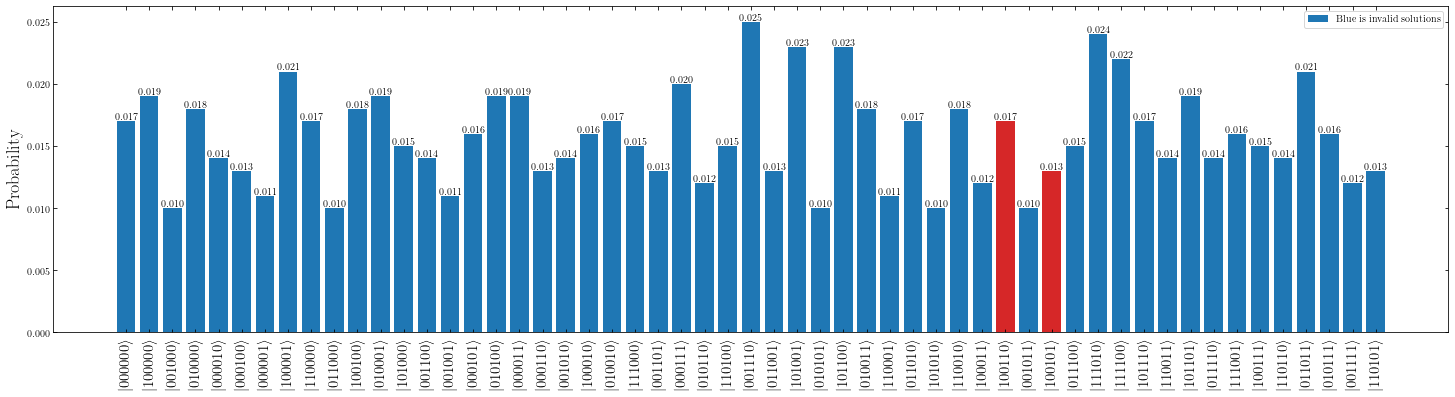

In [16]:
my_simulation.plot_count_histogram(counts = my_simulation.current_counts, solutions = solutions)

In [17]:
idx = 0
my_simulation.print_solution(idx)

#####################################################
#### Most probale state according to simulation ####
----------------------|001110|----------------------
####################################################
with corresponding MSA:
 --- Invalid state --- ** 1'th letter not placed in any column. 
** 2'th letter placed in more than one column. 

(Returning 2D zero array)
[[0 0]
 [0 0]]
####################################################


In [18]:
my_strings   = np.array(["AGG","G"])
my_penalties = np.array([1,1,1])*10
my_msa       = MultipleSequenceAlignment(strings = my_strings, penalties = my_penalties) 

print("Initial matrix:\n",my_msa.initial_MSA)

valid_sol = np.array([1,0,0,0,1,0,0,0,1,1,0,0])
good_sol1 = np.array([1,0,0,0,1,0,0,0,1,0,1,0])
good_sol2 = np.array([1,0,0,0,1,0,0,0,1,0,0,1])
solutions = [valid_sol,good_sol1,good_sol2]

print("Valid solutions:")
for solution in solutions:
    print(my_msa.bit_state_2_matrix(solution))


Initial matrix:
 [['A' 'G' 'G']
 ['G' '_' '_']]
Valid solutions:
[['A' 'G' 'G']
 ['G' '_' '_']]
[['A' 'G' 'G']
 ['_' 'G' '_']]
[['A' 'G' 'G']
 ['_' '_' 'G']]


In [19]:
p = 2
theta_0 = np.ones(p)

my_simulation = QiskitSimulation(initial_MSA=my_msa, theta_0=theta_0, backend_name="qasm_simulator", normalize_weights=True, shots=1000)

options = {"disp":False,"maxiter": 200}
res = minimize(fun = my_simulation.execute_circuit, x0 = theta_0, method='COBYLA',options = options)
print("Total number of different states found in simulation:",len(list(my_simulation.current_counts.values())))
res

Total number of different states found in simulation:
   Normal return from subroutine COBYLA

   NFVALS =   26   F =-7.483225E+01    MAXCV = 0.000000E+00
   X = 2.970994E+00   2.239518E+00
 844


     fun: -74.83225000000009
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 26
  status: 1
 success: True
       x: array([2.97099356, 2.23951765])

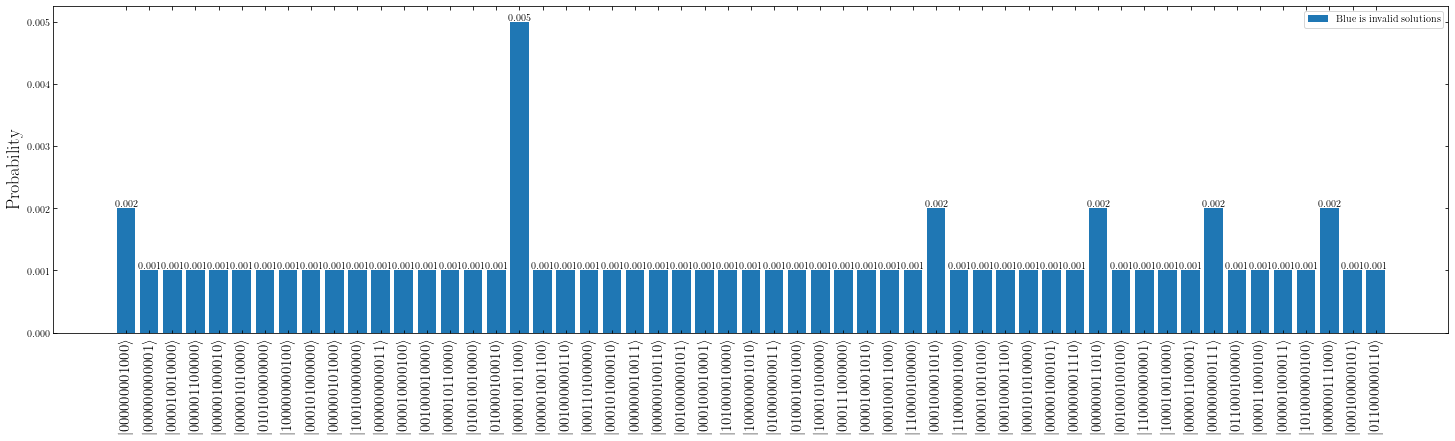

In [20]:
my_simulation.plot_count_histogram(counts = my_simulation.current_counts, solutions = solutions)